In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

### Check whether missing values are present in the dataset

In [4]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Observations:
- Age, Cabin & Embarked = True. It represents that these columns contain missing values
- Other columns = False. It represents that these columns do not contain missing values

### To check the exact number of missing values in the dataset

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### To check for the % of missing in each variable.

In [6]:
data.isnull().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Observations:
- Age contains 19.8% of missing values
- Cabin Contains 77.1 % of missing values
- Embarked contains only 0.22% of missing values

- As per standards, any column contianing more than 30 % missing values should be dropped from the dataset.

In [7]:
!pip install missingno

<AxesSubplot:>

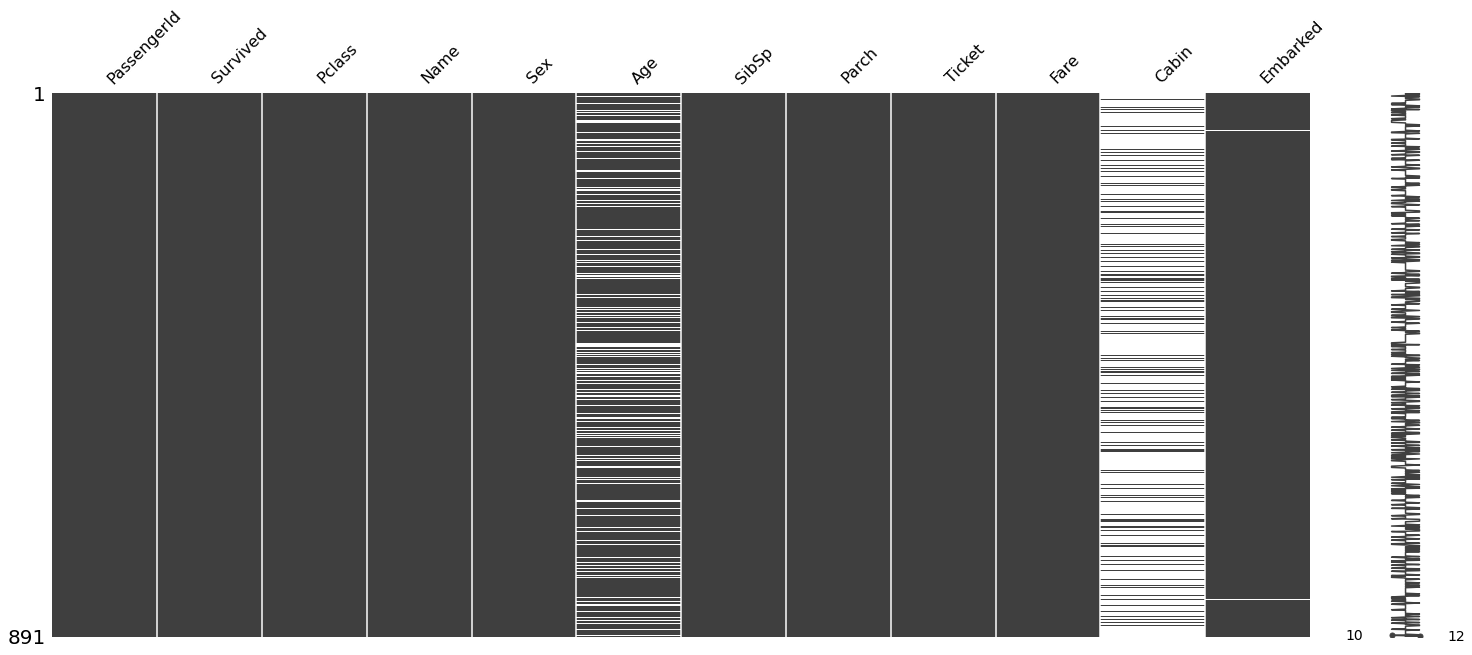

In [8]:
import missingno as msno
msno.matrix(data)

# Missing value treatment

### 1. Dropping the entire column from the data

In [9]:
data.drop('Cabin', axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 2. Dropping the specific rows from the data which are missing
 
1. Pairwise Deletion
2. Listwise Deletion/ Dropping the entire row from the data
3. Dropping the entire column from the data. (Refer 1)

In [10]:
### Pairwise Deletion

data['Age'].mean()

29.69911764705882

In [11]:
data['Age'].median()

28.0

In [12]:
### Listwise Deletion/ Dropping the entire row from the data

data.dropna(inplace = True)
data.shape

(712, 11)

In [13]:
891-177-2

712

In [14]:
data['Age'].dropna(inplace = True)
data.shape

(712, 11)

### Imputing the missing values

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Imputation with a constant values

In [16]:
## Imputing the missing values with some random constant

data.fillna(999, inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### mean imputation
- Only for numerical data(int and float)

In [18]:
## Imputing the missing values with the mean of the column

## Consider only Age for mean imputation because it a numerical data

data['Age'].fillna('mean', inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
## Imputing the missing values with the median of the column

data['Age'] = data['Age'].fillna(data['Age'].mean())
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Example DataFrame

In [21]:
d = {'name' : ['Anil', 'Sunil', 'John', 'Sam'],
    'Salary': [25000, np.nan, 35000, np.nan]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,25000.0
1,Sunil,NaN
2,John,35000.0
3,Sam,NaN


In [22]:
 df['Salary'].mean()

30000.0

In [23]:
df['Salary'].median()

30000.0

In [24]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df

,name,Salary
0,Anil,25000.0
1,Sunil,30000.0
2,John,35000.0
3,Sam,30000.0


In [25]:
df['Salary'].mean()

30000.0

In [26]:
d = {'name' : ['Anil', 'Sunil', 'John', 'Sam'],
    'Salary': [25000, 0, 35000, 0]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,25000
1,Sunil,0
2,John,35000
3,Sam,0


In [27]:
df['Salary'].mean()

15000.0

In [28]:
df['Salary'].median()

12500.0

### Concept:

- 0 is not considered as a missing value

### Median impuation
- only for numerical data(int and float)

In [29]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
## Imputing the missing values using median method

data['Age'] = data['Age'].fillna(data['Age'].median())
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Mode Imputation
- Mode imputation can be done for both numerical and categorical data

In [31]:
d = {'name' : ['Anil', 'Sunil', 'John', 'Sam', 'Anil', 'Sunil', 'Jamuna'],
    'Salary': [25000, 15000, 25000, 30000, 15000, 25000, 15000]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,25000
1,Sunil,15000
2,John,25000
3,Sam,30000
4,Anil,15000
5,Sunil,25000
6,Jamuna,15000


In [32]:
df['name'].mode()[0]

'Anil'

In [33]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
### Imputing the missing using mode method for numerical data
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [36]:
### Imputing the missing using mode method for categorical data
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Backward fill and Forward fill
- Can be applied on both categorical data and numerical data

In [37]:
d = {'name' : ['Anil', np.nan, 'John', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Sam,NaN


In [38]:
df = df.fillna(method = 'ffill')

In [39]:
df

,name,Salary
0,Anil,NaN
1,Anil,25000.0
2,John,35000.0
3,Sam,35000.0


In [40]:
d = {'name' : ['Anil', np.nan, 'John', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Sam,NaN


In [41]:
df = df.fillna(method = 'bfill')
df

,name,Salary
0,Anil,25000.0
1,John,25000.0
2,John,35000.0
3,Sam,NaN


### Note:
1. ffill method - if the first row is having a missing value then imputation will not happen
2. bfill method - if the last row is having a missing value then imputation will not happen

In [42]:
d = {'name' : ['Anil', np.nan, 'John', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Sam,NaN


In [43]:
## pad is another term used for forward fill
df = df.fillna(method = 'pad')
df

,name,Salary
0,Anil,NaN
1,Anil,25000.0
2,John,35000.0
3,Sam,35000.0


In [44]:
d = {'name' : ['Anil', np.nan, 'John', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Sam,NaN


In [45]:
## backfill as another term used for backward fill
df = df.fillna(method = 'backfill')
df

,name,Salary
0,Anil,25000.0
1,John,25000.0
2,John,35000.0
3,Sam,NaN


## Sklearn - SimpleImputer package

In [74]:
d = {'name' : ['Anil', np.nan, 'John', 'Anil', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan, 25000]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Anil,NaN
4,Sam,25000.0


In [75]:
df['name'].mode()

0    Anil
Name: name, dtype: object

### KNN imputation

In [47]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [48]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 2, weights = 'uniform')
data['Age'] = knn_imputer.fit_transform(data[['Age']])

In [49]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Syntax for sklearn package function in general

In [50]:
## Syntax to be followed for the sklearn package in general

from sklearn.<subpackage_name> import <function_name>

<obj_name> = <function_name>(<optional_parameter>)
data = <obj_name>.fit_transform(data[['column_name']])

SyntaxError: invalid syntax (1361993531.py, line 3)

In [51]:
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Sam,NaN


In [ ]:
from sklearn.impute import SimpleImputer

sim_imp = SimpleImputer(strategy = 'mean')
df = sim_imp.fit_transform(df[['Salary']])

### Simple Imputer package Imputation

- Can be applied for both Categorical data and numerical data

In [64]:
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Sam,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   Salary  2 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [76]:
from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer(strategy = 'most_frequent')
df = sim_imp.fit_transform(df[['Salary', 'name']])

In [77]:
df

array([[25000.0, 'Anil'],
       [25000.0, 'Anil'],
       [35000.0, 'John'],
       [25000.0, 'Anil'],
       [25000.0, 'Sam']], dtype=object)

In [78]:
type(df)

numpy.ndarray

In [79]:
cols = ['Salary', 'name']
df = pd.DataFrame(df, columns = cols)

In [80]:
df

,Salary,name
0,25000.0,Anil
1,25000.0,Anil
2,35000.0,John
3,25000.0,Anil
4,25000.0,Sam


In [81]:
d = {'name' : ['Anil', np.nan, 'John', 'Anil', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan, 25000]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Anil,NaN
4,Sam,25000.0


In [82]:
from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer(strategy = 'most_frequent')   ## Doing the mode imputation using most_frequent technique
df = sim_imp.fit_transform(df[['Salary', 'name']])

In [83]:
df

array([[25000.0, 'Anil'],
       [25000.0, 'Anil'],
       [35000.0, 'John'],
       [25000.0, 'Anil'],
       [25000.0, 'Sam']], dtype=object)

In [84]:
df = pd.DataFrame(df)
df

,0,1
0,25000.0,Anil
1,25000.0,Anil
2,35000.0,John
3,25000.0,Anil
4,25000.0,Sam


### Multivariate Feature Imputation - Multivariate imputation by chained equations(MICE)

- It performs regressions over random sample of the data, then takes the average of the multiple regression values and uses that value to impute the missing value.

In [85]:
d = {'name' : ['Anil', np.nan, 'John', 'Anil', 'Sam'],
    'Salary': [np.nan, 25000, 35000, np.nan, 25000]}
df = pd.DataFrame(d)
df

,name,Salary
0,Anil,NaN
1,NaN,25000.0
2,John,35000.0
3,Anil,NaN
4,Sam,25000.0


In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ii = IterativeImputer()
df = ii.fit_transform(df[['Salary']])

In [88]:
df

array([[28333.33333333],
       [25000.        ],
       [35000.        ],
       [28333.33333333],
       [25000.        ]])